In [ ]:
#Importacion ded librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
url='https://raw.githubusercontent.com/Geerdata/DS/main/Datacoder/Arc.%20Modelo/insurance.csv'
dataset= pd.read_csv(url,sep=',')
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## **Conjuntos de datos personales de costos médicos**

**Edad**: edad del beneficiario principal

**Sexo**: género del contratista de seguros, femenino, masculino

**Bmi**: índice de masa corporal, que proporciona una comprensión del cuerpo, pesos relativamente altos o bajos en relación con la altura,
índice objetivo de peso corporal (kg / m ^ 2) utilizando la relación entre altura y peso, idealmente 18,5 a 24,9

**Hijos**: Número de hijos cubiertos por el seguro médico / Número de dependientes

**Fumador**: fumar

**Región**: zona residencial del beneficiario en EE. UU., noreste, sureste, suroeste, noroeste.

**Cargos/Costos**: Costos médicos individuales facturados por el seguro médico

In [ ]:
X = dataset[['age', 'bmi']].copy()
y = dataset['charges'].copy()

In [ ]:
X

,age,bmi
0,19,27.900
1,18,33.770
2,28,33.000
3,33,22.705
4,32,28.880
...,...,...
1333,50,30.970
1334,18,31.920
1335,18,36.850
1336,21,25.800


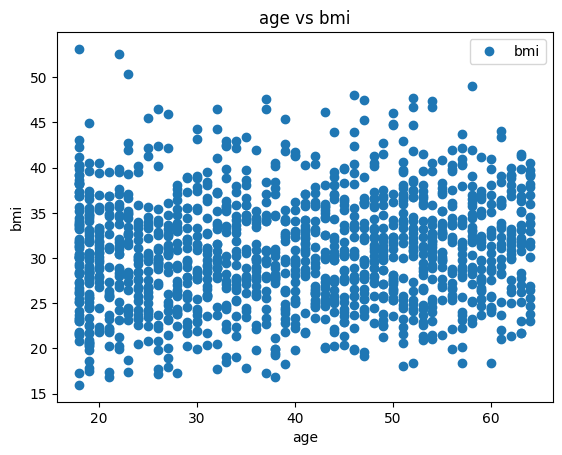

In [ ]:
#Ploteamos el dataset
dataset.plot(x='age', y='bmi', style="o")
plt.title('age vs bmi')
plt.xlabel('age')
plt.ylabel('bmi')
plt.show()

In [ ]:
#Separacion en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Entrenamiento del modelo
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
regressor.coef_

array([223.79653146, 330.79448868])

In [ ]:
regressor.intercept_

-5571.083408548648

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
age,223.796531
bmi,330.794489


In [ ]:
#Hacemos nuestras predicciones
y_pred = regressor.predict(X_test)
y_pred

array([12827.51175996, 12416.04227446, 17645.30443342, 13239.86114997,
        9240.01076808, 16229.08222579,  6128.888602  , 21290.65969872,
        6414.65618179, 14885.44051354,  9214.19805927, 13723.57779033,
       10707.22492408, 18732.70363458, 21392.81895625, 17828.49095963,
       19513.25541024, 17064.35569077, 14002.34244639, 12945.57727268,
        7929.81815761, 14836.06777551,  8737.20314528, 12519.71490575,
       14920.68418645, 17324.29318071, 19467.59503211, 10527.57539699,
       13746.48696926,  8427.40004675, 13073.05636846, 17712.85348728,
       10663.44757262,  7742.16258462, 10171.46107005, 17667.03512941,
        7861.61825346, 13942.92265606, 14048.40723953, 14129.55772585,
        8141.77306564,  9722.84750392, 18803.96504833, 16054.93962973,
       13640.10510023, 16729.76038664, 10253.26240665,  8062.13595308,
       15950.84520238, 14065.80948743, 20535.93801292,  8172.68829047,
       17082.28557132,  7099.26017469, 18350.77659884, 16240.5541963 ,
      

In [ ]:
#Convertimos en df la salida
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
764,9095.06825,12827.511760
887,5272.17580,12416.042274
890,29330.98315,17645.304433
1293,9301.89355,13239.861150
259,33750.29180,9240.010768
...,...,...
109,47055.53210,20135.676682
575,12222.89830,16396.801674
535,6067.12675,12203.700332
543,63770.42801,22196.895999


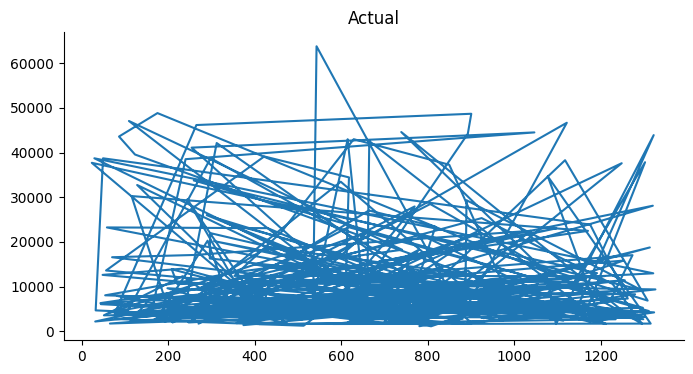

In [ ]:
# @title Actual

from matplotlib import pyplot as plt
df['Actual'].plot(kind='line', figsize=(8, 4), title='Actual')
plt.gca().spines[['top', 'right']].set_visible(False)

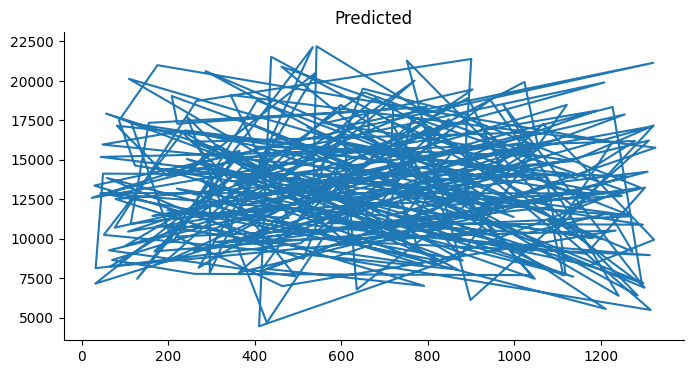

In [ ]:
# @title Predicted

from matplotlib import pyplot as plt
df['Predicted'].plot(kind='line', figsize=(8, 4), title='Predicted')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
import numpy as np
def mse(actual, predicted):
    return np.mean(np.square(actual-predicted))

In [ ]:
def mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

In [ ]:
mape(y_test, y_pred)

130.40023080857895

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) # MAE
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) # MSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # RMSE

Mean Absolute Error: 9222.66453523868
Mean Squared Error: 131440262.76073726
Root Mean Squared Error: 11464.739977894713


In [ ]:
from sklearn.metrics import r2_score
print('El r^2 es:',r2_score(y_test,y_pred))

El r^2 es: 0.1533569292467798
